In [1]:
from IPython.display import display, HTML
import scipy.constants as sc
from scipy.optimize import fsolve
from ipywidgets import interact, widgets
%matplotlib notebook

import numpy as np
import cmath
import matplotlib.pyplot as plt
import scipy.constants as sc
plt.rcParams.update({
    "text.usetex": True,
    'text.latex.preamble': r"\usepackage{amsmath} \boldmath"
})
import os
import h5py

print(os.getpid())
%cd ../

19080
/media/work/docs/codes/QuCF/scripts-py


In [2]:
# --- Launch to change cells' width ---
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import pylib.mix as mix
import pylib.qucf_read as qucf_r
import pylib.qucf_oracle as qucf_o
import kin1d1d as kin
path_ = "../simulations/KIN1D1D/"
file_name_oracle_ = "circuit_OH"
path_test_ = "../simulations/test-simplified/"
path_cl_ = "../results/KIN1D1D-results/"
path_save_ = "../results/KIN1D1D-results/figs/"
file_name_oracle_ = "circuit_OH"

In [4]:
# ---------------------------------------------------------------
# --- Read the matrix ---
# ---------------------------------------------------------------
mix.reload_module(qucf_r)
mix.reload_module(kin)

# dd_NH_orig = qucf.read_matrix(path_, "archive/flat_NH-orig_OUTPUT.hdf5")

print("--- Quantum data ---")
dd_33 = qucf_r.read_matrix(path_, "flat_33_OUTPUT.hdf5") #  nx = 3, nv = 3

print()
dd_34 = qucf_r.read_matrix(path_, "flat_33_OUTPUT.hdf5") #  nx = 3, nv = 4

print()
dd_44     = qucf_r.read_matrix(path_, "flat_44_OUTPUT.hdf5")      # nv = 4, nx = 4 (D-matrix)

print()
# dd_55 = qucf_r.read_matrix(path_, "flat_55_OUTPUT.hdf5") #  nx = 5, nv = 5

print("\n --- Classical data ---")
cl_33 = kin.read_matrix(path_cl_, "out_3_3_w1.2_Lx100_Lv4_flat.hdf5")
cl_44 = kin.read_matrix(path_cl_, "out_4_4_w1.2_Lx100_Lv4_flat.hdf5")
# cl_55 = kin.read_matrix(path_cl_, "out_5_5_w1.2_Lx100_Lv4_flat.hdf5")

--- Quantum data ---
Reading the matrix from: flat_33_OUTPUT.hdf5
from the path: ../simulations/KIN1D1D/
date of the simulation:  06-06-2023 09:51:13
matrix name:  U_BE
N = 128

Reading the matrix from: flat_33_OUTPUT.hdf5
from the path: ../simulations/KIN1D1D/
date of the simulation:  06-06-2023 09:51:13
matrix name:  U_BE
N = 128

Reading the matrix from: flat_44_OUTPUT.hdf5
from the path: ../simulations/KIN1D1D/
date of the simulation:  06-06-2023 08:57:47
matrix name:  U_BE
N = 512


 --- Classical data ---
date of the simulation:  06-22-2023 15:48:52
N, Nx, Nv = 128, 8, 8
date of the simulation:  06-06-2023 16:39:51
N, Nx, Nv = 512, 16, 16


In [5]:
# ------------------------------------------------------------
# --- Chosen structures ---
# ------------------------------------------------------------
# dd_q_ = dict(dd_55)
# dd_c_ = dict(cl_55)

# dd_q_ = dict(dd_44)
# dd_c_ = dict(cl_44)

dd_q_ = dict(dd_33)
dd_c_ = dict(cl_33)

In [6]:
# -------------------------------------------------------------
# --- Normalize the matrix and define the circuit structure ---
# -------------------------------------------------------------
mix.reload_module(mix)
mix.reload_module(qucf_o)
mix.reload_module(kin)

# --- normalize the whole matrix A ---
Nx, Nv = 1<<dd_q_["regs"]["rx"], 1<<dd_q_["regs"]["rv"]
Nvar = Nx * Nv

A = dd_c_["A"]
D = dd_q_["A-real"]
A_norm = qucf_o.normalize_matrix_A(A, D)
del A

# --- take only the submatrix F from the normalized matrix A ---
A_F_norm = A_norm[0:Nvar, 0:Nvar]
D_F      = D[0:Nvar, 0:Nvar]

A_CE = A_norm[0:Nvar, Nvar:2*Nvar]
A_Cf = A_norm[Nvar:2*Nvar, 0:Nvar]
A_S  = A_norm[Nvar:2*Nvar, Nvar:2*Nvar]
del A_norm, D

# Define the circuit structure (problem-specific part):
oo_circ = kin.init_circuit_kin(dd_q_)

# Compute the number of nonzero elements:
N_nz_D = qucf_o.compute_Nz(oo_circ, D_F)
N_nz_A = qucf_o.compute_Nz(oo_circ, A_F_norm)
print()
print("N-nz(D_F): {:d}".format(N_nz_D))
print("N-nz(A_F): {:d}".format(N_nz_A))


# --- Extract a fixed part of a matrix and a part with profiles ---
# !!! only for printing: to avoid very small values!!!
# B_fixed_print = kin.extract_fixed_matrix_from_F(oo_circ, dd_c_["A"][0:Nvar, 0:Nvar], D_F)

# for actual calculations:
B_fixed = kin.extract_fixed_matrix_from_F(oo_circ, A_F_norm, D_F)

amin.(excl. zero) value in D: 		8.798e-03
amax. value in A: 			4.000e+00
amin.(excl. zero) value in A: 		6.118e-04

amax. value in A-norm: 			4.690e-03
amin. (excl. zero)  value in A-norm: 	7.174e-07
Adding a register 'axr'...
Adding a register 'avr'...
Adding a register 'rx'...
Adding a register 'rv'...

N-nz(D_F): 320
N-nz(A_F): 320
N-nonzero: 200


<IPython.core.display.Javascript object>


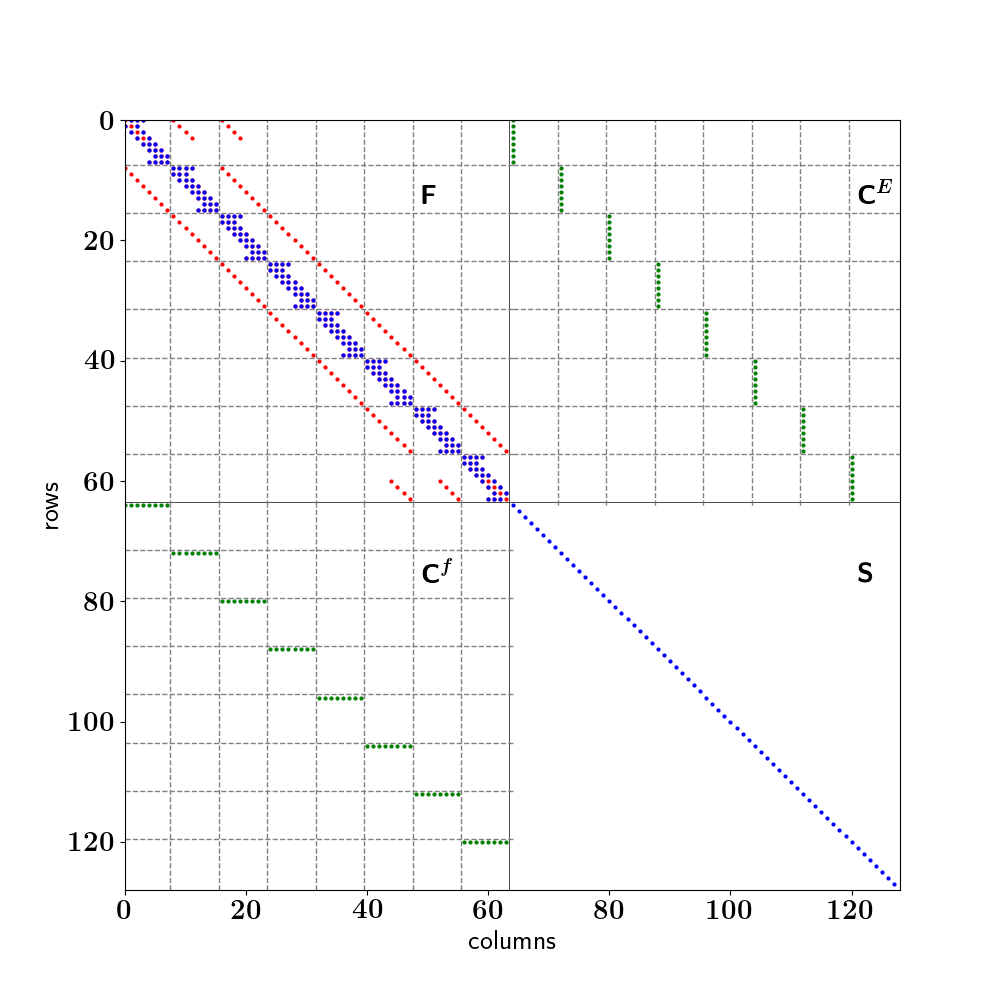

In [40]:
# --------------------------------------------------------------
# --- Plot the matrix structure in different colors ---
# --------------------------------------------------------------
mix.reload_module(mix)
mix.reload_module(kin)

fig_B_colored_structure = kin.plot_colored_A_structure(
    Nx, Nv, 
    B_fixed, D_F, A_CE, A_Cf, A_S,
    flag_save = True, 
    path_save = path_save_, 
    fontsize = 20, 
    cmap='bwr'
)

In [28]:
# -----------------------------------------------
# --- Computation of oracle angles ---
# -----------------------------------------------
mix.reload_module(mix)
mix.reload_module(qucf_o)

# Compute angles of rotations gates:
Ty, Tc_ampl, Tc_phase = qucf_o.compute_angles(B_fixed)

# Rearrange angles:
grid_Ry       = qucf_o.create_grid_of_gates(oo_circ, Ty)
grid_Rc_ampl  = qucf_o.create_grid_of_gates(oo_circ, Tc_ampl)
grid_Rc_phase = qucf_o.create_grid_of_gates(oo_circ, Tc_phase)

# Create original groups:
# groups_Ry = qucf_o.create_groups(oo_circ, grid_Ry,      grid_R_phase=None,        )
# groups_Rc = qucf_o.create_groups(oo_circ, grid_Rc_ampl, grid_R_phase=grid_Rc_phase)

groups_Ry = qucf_o.create_groups_neighbor(oo_circ, grid_Ry,      grid_R_phase=None,        )
groups_Rc = qucf_o.create_groups_neighbor(oo_circ, grid_Rc_ampl, grid_R_phase=grid_Rc_phase)
sys_gates_ = qucf_o.SystemGates__(oo_circ, groups_Ry, groups_Rc)

# # Split groups:
sys_gates_.n_split_ = 1
sys_gates_.split_gates_groups()
sys_gates_.split_gates_groups()
sys_gates_.split_gates_groups()
sys_gates_.split_gates_groups()
sys_gates_.split_gates_groups()

# Sort groups:
sys_gates_.sort_gates_groups()

# Extend the gates:
sys_gates_.coef_ext_ = 4
sys_gates_.extend_gates_groups()

# Construct the circuit:
sys_gates_.construct_circuit_OH(path_, file_name_oracle_)

N-input-registers = 2 with [3, 3] qubits
N-ancilla-registers = 2 with [3, 3] qubits
Total number of input qubits: 6
Matrix size that can be encoded: 64
N-gates: 215


In [ ]:
# NoN-neighbor (diff 100):
# 3x3, Nz = 200: n_split = 0 -> 374 gates 
#                n_split = 5, 5 iterations; -> 200 gates


# 4x4, Nz = 784: n_split = 8, 5 iterations; -> 721 gates
#                n_split = 5, 5 iterations; -> 712 gates
#                n_split = 4, 5 iterations; -> 725 gates
#
# 5x5, Nz = 3104: n_split = 8, 5 iterations; -> 1529 gates
#                 n_split = 5, 5 iterations; -> 1470 gates
#                 n_split = 6, 5 iterations; -> 1456 gates
# ---
# Neighbor (diff 1):
# 4x4, Nz = 784:  1214 gates
# 5x5, Nz = 3104: 2290 gates

In [14]:
# --- Recreate the matrix using the groups ---
qucf_o.compare_matrices(oo_circ, sys_gates_.reconstruct_matrix_using_groups(), B_fixed)

Matrix size: 256

Max. abs. diff-real: 1.026e-16
Max. abs. diff-imag: 1.076e-16


In [34]:
# --- Count the number of groups ---
mix.reload_module(qucf_o)
sys_gates_.count_groups()

# sys_gates_.print_angles("Rc")


N = 1024
--- Groups for the gate Ry ---
Number of groups: 365
--- Groups for the gate Rc ---
Number of groups: 161



In [16]:
# ----------------------------------------------------------
# --- Read results ---
# ----------------------------------------------------------
mix.reload_module(qucf_r)

dd_res = qucf_r.read_matrix(path_, "flat_OUTPUT.hdf5") 

A_F_recon = dd_res["A"][0:Nvar, 0:Nvar]
B_fixed_recon = kin.extract_fixed_matrix_from_F(oo_circ, A_F_recon, D_F)

qucf_o.compare_matrices(oo_circ, B_fixed_recon, B_fixed)
del A_F_recon, B_fixed_recon

Reading the matrix from: flat_OUTPUT.hdf5
from the path: ../simulations/KIN1D1D/
date of the simulation:  07-06-2023 15:42:07
matrix name:  U_BE
N = 512
N-nonzero: 784

Max. abs. diff-real: 2.413e-13
Max. abs. diff-imag: 2.380e-13


In [7]:
# ---------------------------------------------------------------
# --- Function to print matrix subblocks ---
# ---------------------------------------------------------------
mix.reload_module(mix)
def print_submatrix(dd, B):
    nx, nv = dd["regs"]["rx"], dd["regs"]["rv"]
    Nx, Nv = 1<<dd["regs"]["rx"], 1<<dd["regs"]["rv"]
    
    print("****** Nv: {:d} *************************************".format(Nv))
    
    ir_x, ic_x = 0, 0 # x[0], diag
#     ir_x, ic_x = 0, 1 # V-f: x[0], diag+1
#     ir_x, ic_x = 0, 2 # V-f: x[0], diag+2
#     ir_x, ic_x = 0, 3 # V-f: x[0], diag+3

#     ir_x, ic_x = 1, 0 # V-f: x[1], diag-1
#     ir_x, ic_x = 1, 1 # V-f: x[1], diag
#     ir_x, ic_x = 1, 2 # V-f: x[1], diag+1
#     ir_x, ic_x = 1, 3 # V-f: x[1], diag+2

#     ir_x, ic_x = 2, 1 # V-f: x[1], diag-1
#     ir_x, ic_x = 2, 2 # V-f: x[1], diag
#     ir_x, ic_x = 2, 3 # V-f: x[1], diag+1

#     ir_x, ic_x = 3, 2 # V-f: x[1], diag-1
#     ir_x, ic_x = 3, 3 # V-f: x[1], diag
#     ir_x, ic_x = 3, 4 # V-f: x[1], diag+1

#     ir_x, ic_x = Nx-1, Nx-4 # V-f: x[1], diag-3
#     ir_x, ic_x = Nx-1, Nx-3 # V-f: x[1], diag-2
#     ir_x, ic_x = Nx-1, Nx-2 # V-f: x[1], diag-1
#     ir_x, ic_x = Nx-1, Nx-1 # V-f: x[1], diag

    
    # --------------------------------------------------
    Nr_print, Nc_print = Nv, Nv
    ir_start, ic_start = Nv * ir_x, Nv * ic_x
    
    
    mix.print_subblock_colored(
        B, 
        ir_start, ic_start,
        Nr_print, Nc_print,
        ff=[6, 3, "f"], 
        n_in_row = Nc_print, 
        gap_be = " ", 
    )
    
# -------------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------------
# print_submatrix(dd_44, Ty_44) 
# print_submatrix(dd_55, Ty_55) 

# print_submatrix(cl_33, np.real(A_F_norm)) 
# print_submatrix(cl_33, np.imag(A_F_norm)) 

print_submatrix(cl_44, np.real(cl_44["A"])) 
print_submatrix(cl_55, np.real(cl_55["A"])) 

# print_submatrix(cl_44, np.imag(cl_44["A"])) 
# print_submatrix(cl_55, np.imag(cl_55["A"]))

****** Nv: 16 *************************************
--- 0:  -0.886 -0.035  0.028 -0.007  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
--- 1:   0.007 -0.794  0.007  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
--- 2:   0.000  0.007 -0.674  0.007  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
--- 3:   0.000  0.000  0.007 -0.554  0.007  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
--- 4:   0.000  0.000  0.000  0.007 -0.434  0.007  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
--- 5:   0.000  0.000  0.000  0.000  0.007 -0.314  0.007  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
--- 6:   0.000  0.000  0.000  0.000  0.000  0.007 -0.194  0.007  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
--- 7:   0.000  0.000  0.000  0.000  0.000  0.000  0.007 -0.074  0.007  0.000  0.000  0.000  0.000  0.000  0

In [27]:
# ---------------------------------------------------------------
# --- Function to print matrix subblocks ---
# ---------------------------------------------------------------
mix.reload_module(mix)
def print_submatrix_several_subblocks(dd, BB):
    nx, nv = dd["regs"]["rx"], dd["regs"]["rv"]
    Nx, Nv = 1<<dd["regs"]["rx"], 1<<dd["regs"]["rv"]
    
    print("\n\n*******************************************************************************")
    print("****** Nv: {:d} *************************************".format(Nv))
    
    ircs = [
#         [0, 0],  # x[0], diag
#         [1, 1],  # x[1], diag
#         [2, 2],  # x[2], diag
        [5, 5],  
#         [6, 6], 
#         [7, 7],
        [8, 8], 
#         [Nx-2, Nx-2],
#         [Nx-1, Nx-1],
    ]
    
    # --------------------------------------------------
    Nr_print, Nc_print = Nv, Nv
    for counter in range(len(ircs)):
        ir_start, ic_start = Nv * ircs[counter][0], Nv * ircs[counter][1]
        
        print("\n---------------------------------------------------------")
        print("ir_start, ic_start (in Nv): {:d}, {:d}".format(ircs[counter][0], ircs[counter][1]))

        print("--- REAL PART ---")
        mix.print_subblock_colored(
            np.real(BB), 
            ir_start, ic_start,
            Nr_print, Nc_print,
#             ff=[6, 3, "f"], 
            ff=[10, 12, "e"],
            n_in_row = Nc_print, 
            gap_be = " ", 
        )
#         print("--- IMAG PART ---")
#         mix.print_subblock_colored(
#             np.imag(BB), 
#             ir_start, ic_start,
#             Nr_print, Nc_print,
#             ff=[6, 3, "f"], 
#             n_in_row = Nc_print, 
#             gap_be = " ", 
#         )
    
# -------------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------------

# BB = np.divide(dd_c_["A"], dd_q_["A"], out=np.zeros_like(dd_c_["A"]), where = dd_q_["A"]!=0)
# print_submatrix_several_subblocks(dd_q_, BB) 
# del BB

# print_submatrix_several_subblocks(
#     dd_q_, 
#     np.divide(dd_c_["A"], dd_q_["A"], out=np.zeros_like(dd_c_["A"]), where = dd_q_["A"]!=0)
# ) 
# print_submatrix_several_subblocks(dd_q_, np.divide(A_F_norm, D_F, out=np.zeros_like(A_F_norm), where = D_F!=0)) 
# print_submatrix_several_subblocks(dd_44, B_fixed_44) 

print_submatrix_several_subblocks(dd_44, B_fixed) 



*******************************************************************************
****** Nv: 16 *************************************

---------------------------------------------------------
ir_start, ic_start (in Nv): 5, 5
--- REAL PART ---
--- 0:  1.412893134474e-04 -4.995331582391e-04 3.996265265913e-04 -1.412893134474e-04 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00
--- 1:  9.990663164783e-05 -9.990663164783e-05 1.412893134474e-04 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00
--- 2:  0.000000000000e+00 9.990663164783e-05 -1.412893134474e-04 1.412893134474e-04 0.000000000000e+00 0.000000000000e+00 0.0000

In [9]:
# ---------------------------------------------------------------
# --- Function to print matrix subblocks (using absolute indices) ---
# ---------------------------------------------------------------
mix.reload_module(mix)
def print_submatrix_several_subblocks_absolute_ins(dd, BB):
    nx, nv = dd["regs"]["rx"], dd["regs"]["rv"]
    Nx, Nv = 1<<dd["regs"]["rx"], 1<<dd["regs"]["rv"]
    
    print("\n\n*******************************************************************************")
    print("****** Nv: {:d} *************************************".format(Nv))
    
    Nv = 16
    ircs = [
        [0, 0],  
        [16, 16], 
        [32, 32], 
#         [48, 48], 
    ]

    
    # --------------------------------------------------
    Nr_print, Nc_print = Nv, Nv
    for counter in range(len(ircs)):
        ir_start, ic_start = ircs[counter][0], ircs[counter][1]
        
        print("\n---------------------------------------------------------")
        print("ir_start, ic_start (in Nv): {:d}, {:d}".format(ircs[counter][0], ircs[counter][1]))

        print("--- REAL PART ---")
        mix.print_subblock_colored(
            np.real(BB), 
            ir_start, ic_start,
            Nr_print, Nc_print,
#             ff=[6, 3, "f"], 
            ff=[10, 6, "e"],
            n_in_row = Nc_print, 
            gap_be = " ", 
        )
#         print("--- IMAG PART ---")
#         mix.print_subblock_colored(
#             np.imag(BB), 
#             ir_start, ic_start,
#             Nr_print, Nc_print,
#             ff=[6, 3, "f"], 
#             n_in_row = Nc_print, 
#             gap_be = " ", 
#         )
    
# -------------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------------
print_submatrix_several_subblocks_absolute_ins(dd_44, B_fixed) 



*******************************************************************************
****** Nv: 16 *************************************

---------------------------------------------------------
ir_start, ic_start (in Nv): 0, 0
--- REAL PART ---
--- 0:  0.000000e+00 -7.064466e-04 5.651573e-04 -1.998133e-04 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
--- 1:  1.412893e-04 0.000000e+00 1.998133e-04 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
--- 2:  0.000000e+00 1.412893e-04 0.000000e+00 1.998133e-04 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
--- 3:  0.000000e+00 0.000000e+00 1.998133e-04 0.000000e+00 1.412893e-04 0.000000e+00 0.000000e+00 0.00000

In [29]:
mix.reload_module(qucf_o)
row_index = 1
column_index = 9
anc_column_ints = oo_circ.compute_integers_in_ancillae_from_row_column(row_index, column_index)
print(anc_column_ints)

[1, 0]


In [30]:
mix.reload_module(qucf_o)

oo_circ.get_column_index_from_anc_integers(
    anc_column_ints,
    oo_circ.compute_integers_in_input_registers(row_index),
)

9

In [34]:
oo_circ.get_section_index(anc_column_ints)

31

In [17]:
theta_y = 3.141310074962e+00
print("{:20.6e}".format(np.cos(theta_y/2.)))

        1.412893e-04


In [27]:
theta_y, theta_z = 3.109751982373e+00, -3.136488498004e+00
print("{:20.3e}".format(np.exp(- 1j * theta_z/2.) * np.cos(theta_y/2.)))

8.839e-02
3.591e-06+1.407e-03j
           1.407e-03


In [42]:
np.min([10,20])

10